<font color='blue'> Привет!) Ты проделал большую работу над проектом. Как всегда мои комментарии будут выделены синим. Пожайлуста, постарайся учесть их в дальнейших проектах и/или доработках.</font>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

#### Выводы

Всего в таблице 22 столбца, в каждом из которых содержится следующая информация:

1. airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
2. balcony — число балконов
3. ceiling_height — высота потолков (м)
4. cityCenters_nearest — расстояние до центра города (м)
5. days_exposition — сколько дней было размещено объявление (от публикации до снятия)
6. first_day_exposition — дата публикации
7. floor — этаж
8. floors_total — всего этажей в доме
9. is_apartment — апартаменты (булев тип)
10. kitchen_area — площадь кухни в квадратных метрах (м²)
11. last_price — цена на момент снятия с публикации
12. living_area — жилая площадь в квадратных метрах(м²)
13. locality_name — название населённого пункта
14. open_plan — свободная планировка (булев тип)
15. parks_around3000 — число парков в радиусе 3 км
16. parks_nearest — расстояние до ближайшего парка (м)
17. ponds_around3000 — число водоёмов в радиусе 3 км
18. ponds_nearest — расстояние до ближайшего водоёма (м)
19. rooms — число комнат
20. studio — квартира-студия (булев тип)
21. total_area — площадь квартиры в квадратных метрах (м²)
22. total_images — число фотографий квартиры в объявлении

Каждая строка таблицы является описанием жилого (проданного/помещенного в архив) объекта по 22-ум параметрам. Количество значений в столбцах различается – это говорит о том, что в данных есть пропущенные значения.

<font color='blue'> Хорошо. Только здесь лучше подробнее расписать план на предобработку: где есть пропуски, как с ними работать, где надо заменить тип данных?</font>

### Шаг 2. Предобработка данных

#### Пропущенные значения

Всего в таблице 23699 записи. Столбцы в которых есть пропущенные значение:

In [3]:
#заменим пропущеные значения балконов на 0 – скорее всего люди оставили их пустыми, потому что балкона просто нет
df['balcony'] = df['balcony'].fillna(0)

In [4]:
#заменим пропущенные значения высоты потолков на медианное значение
median_height = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(median_height)

In [5]:
#пустые этажи удалим, потому что:
#а) медиана и среднее тут не валидны для расчета и замены пустых значений 
#б) количество пропусков не значительно – меньше 0.3%
df.dropna(subset=['floors_total'], inplace=True)

In [6]:
# заполним пропуски в столбцах living_area (жилая площадь) и kitchen_area (площадь кухни)
#1. для тех мест где living_area ИЛИ kitchen_area не пустые, посчитаем living_area или kitchen_area
# через разницу от total_area
df.loc[df['living_area'].isnull() & df['kitchen_area'] > 0, 'living_area'] = df['living_area'].fillna(df['total_area'] - df['kitchen_area'])
df.loc[df['kitchen_area'].isnull() & df['living_area'] > 0, 'kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] - df['living_area'])

#2. для оставшихся кейсов, где living_area и kitchen_area пустые – посчитаем медианные в зависимости 
#от количества комнат
rooms = df['rooms'].unique()
for i in rooms:
    median_living = df.loc[df['rooms']==i, 'living_area'].median()
    df.loc[(df['rooms']==i) & (df['living_area'].isnull()), 'living_area'] = df['living_area'].fillna(median_living)
    median_kitchen = df.loc[df['rooms']==i, 'kitchen_area'].median()
    df.loc[ (df['rooms']==i) & (df['kitchen_area'].isnull()), 'kitchen_area'] = df['kitchen_area'].fillna(median_kitchen)

In [7]:
#в названиях населенных пунктов заменим пустые значения на "неизвестный населенный пункт"
df['locality_name'] = df['locality_name'].fillna('неизвестный населенный пункт')

In [8]:
#в столбце со средним расстоянием до центра заменим пустые значения на медианные для данного населенного пункта
df['locality_name'] = df['locality_name'].str.lower()

In [9]:
#заменим тип данных в столбце с датой выставления объявления
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M')

In [10]:
#приведем значения к целочисленным
df['last_price'] = df['last_price'].astype('int')
df['total_area'] = df['total_area'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')

In [11]:
#будем считать что если, в столбце is_apartment пропущены значения, то это значит что квартира НЕ апартаменты
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'] = df['is_apartment'].astype('bool')

In [12]:
#разбираемся с расстоянием до центра
city_to_center_info = df.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc='sum')
no_data_to_city_center = city_to_center_info.query('cityCenters_nearest == 0')
len(no_data_to_city_center) 
#в 338 из 365 населенных пунктах нет информации о расстоянии до центра 

338

In [13]:
#пометим города с отсутствующей инфой о расстоянии до центра минус единицей
#вероятно это мелкие деревни и поселки
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(-1)

In [14]:
len(df.query('days_exposition.isnull()'))
#3172 вероятно сделка по этим квартирам не закрыта

3172

In [15]:
#исключим их, и будем иметь в виду, что будущий анализ будет вестить только по закрытым сделкам
df.dropna(subset=['days_exposition'], inplace=True)

In [16]:
#поля airports_nearest, parks_around3000, ponds_nearest, parks_nearest, ponds_around3000   
# эти поля можно удалить, либо заменить пропущенные в них значения на 0, т.к для будущего анализа они не критичны
df['airports_nearest'] = df['airports_nearest'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)
df['parks_nearest'] = df['parks_nearest'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20441 entries, 1 to 23697
Data columns (total 22 columns):
total_images            20441 non-null int64
last_price              20441 non-null int64
total_area              20441 non-null int64
first_day_exposition    20441 non-null datetime64[ns]
rooms                   20441 non-null int64
ceiling_height          20441 non-null float64
floors_total            20441 non-null int64
living_area             20441 non-null float64
floor                   20441 non-null int64
is_apartment            20441 non-null bool
studio                  20441 non-null bool
open_plan               20441 non-null bool
kitchen_area            20441 non-null float64
balcony                 20441 non-null float64
locality_name           20441 non-null object
airports_nearest        20441 non-null float64
cityCenters_nearest     20441 non-null float64
parks_around3000        20441 non-null float64
parks_nearest           20441 non-null float64
ponds_around3

Теперь массив стал более опрятным и с ним можно работать дальше.

<font color='blue'> Хорошо, пропуски обработаны хорошо.</font>

### Шаг 3. Посчитайте и добавьте в таблицу

In [19]:
#цена квадратного метра
df['metre_price'] = df['last_price']/df['total_area'].astype('int')

In [20]:
#день недели, месяц и год публикации объявления
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_year'] = df['first_day_exposition'].dt.year

In [22]:
#добавим цену в миллионах, для упрощения восприятния 
df['last_price_mln'] = df['last_price']/10**6

In [23]:
#функция для определения этажа квартиры
def floor_type(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']/row['floors_total']==1:
        return 'последний'
    return 'другой'

In [24]:
#добавим столбцец с указанием этажа
df['floor_type'] = df.apply(floor_type, axis=1)

In [27]:
#посчитаем соотношение жилой и общей площади
df['living_to_total_area'] = df['living_area']/df['total_area']

In [28]:
#посчитаем cоотношение площади кухни и общей площади
df['kitchen_to_total_area'] = df['kitchen_area']/df['total_area']

<font color='blue'> Отлично, данные готовы к работе. Только в конце можно вывести табличку head(), чтоб посмотреть, что получилось в итоге предобработке.</font>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучим параметры: площадь, цена, число комнат, высота потолков

(0, 125)

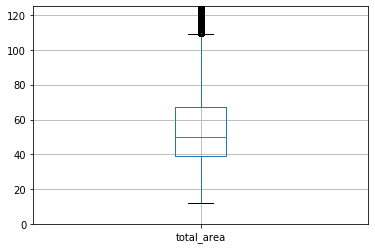

In [30]:
#построим ящик с усами для площади квартиры
total_area = pd.DataFrame(data=df['total_area'])
total_area.boxplot()
plt.ylim(0, 125)

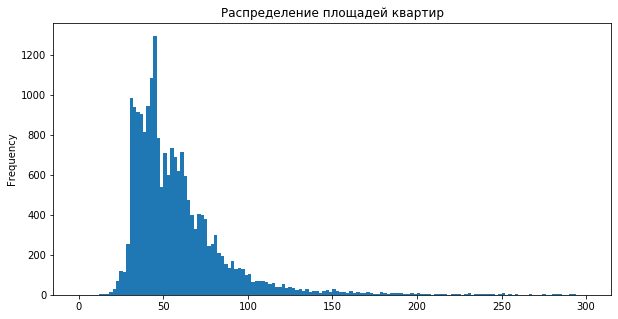

In [31]:
#построим гистограмму для площади квартиры
df['total_area'].plot(title='Распределение площадей квартир', kind='hist', bins=150, range=(0,300),figsize=(10,5))

In [32]:
#выведем описательную статистику для площади квартиры
df['total_area'].describe()

count    20441.000000
mean        58.635194
std         34.073863
min         12.000000
25%         39.000000
50%         50.000000
75%         67.000000
max        900.000000
Name: total_area, dtype: float64

(-1, 15)

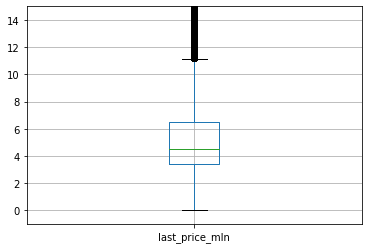

In [33]:
#построим ящик с усами для цены
last_price = pd.DataFrame(data=df['last_price_mln'])
last_price.boxplot()
plt.ylim(-1,15)

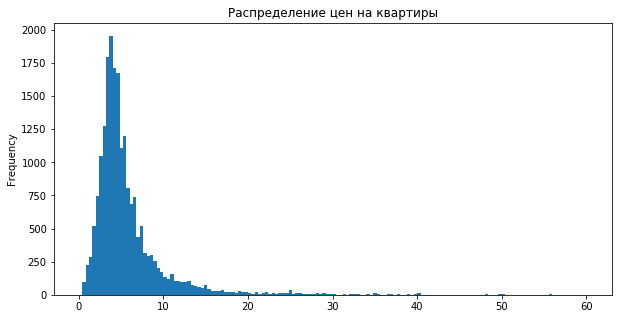

In [34]:
#построим гистограмму для цены
df['last_price_mln'].plot(title='Распределение цен на квартиры', kind='hist',bins=150, range=(0,60), figsize=(10,5))

In [36]:
#выведем описательную статистику для цены
df['last_price_mln'].describe()

count    20441.000000
mean         6.265166
std         10.878209
min          0.012190
25%          3.400000
50%          4.500000
75%          6.500000
max        763.000000
Name: last_price_mln, dtype: float64

(0, 12)

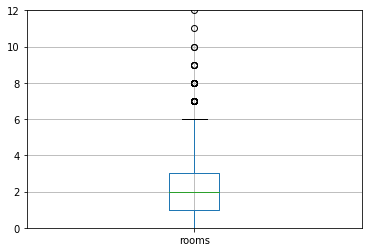

In [37]:
#построим ящик с усами для комнат
rooms = pd.DataFrame(data=df['rooms'])
rooms.boxplot()
plt.ylim(0,12)

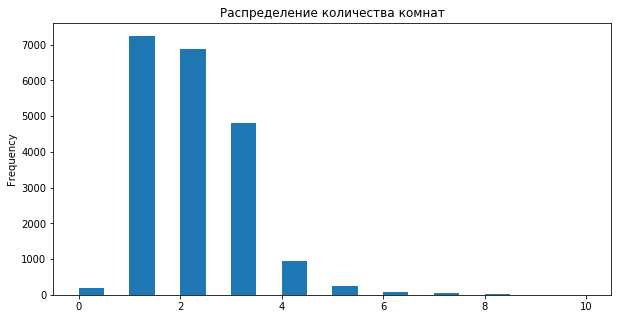

In [40]:
#построим гистограмму для комнат
df['rooms'].plot(title='Распределение количества комнат', kind='hist', bins=20, range=(0,10), figsize=(10,5))

In [41]:
#выведем описательную статистику для комнат
df['rooms'].describe()

count    20441.000000
mean         2.024999
std          1.055000
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

(1.5, 3.5)

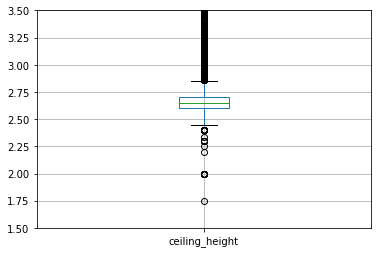

In [42]:
#построим ящик с усами для высоты потолков
ceilings = pd.DataFrame(data=df['ceiling_height'])
ceilings.boxplot()
plt.ylim(1.5, 3.5)

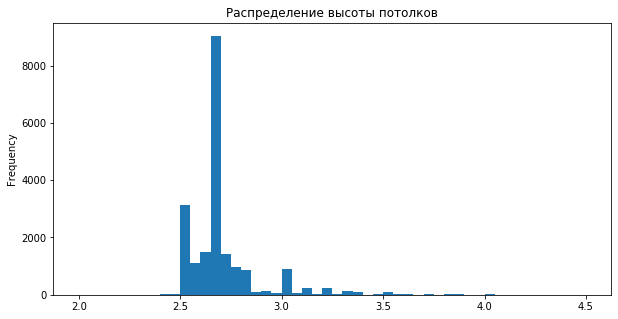

In [45]:
#построим гистограмму для высоты потолков
df['ceiling_height'].plot(title='Распределение высоты потолков', kind='hist', bins=50, range=(2, 4.5), figsize=(10,5))

In [46]:
#выведем описательную статистику для высоты потолков
df['ceiling_height'].describe()

count    20441.000000
mean         2.715883
std          0.971916
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

##### Вывод 1

Средняя площадь квартиры равна 58 кв. метрам, при этом медианное значение меньше и равно 50 кв. метрам. Это вызвано пристуствием в выборке анамально большой квартиры в 900 кв. метров. Вероятно, это замок или много этажный дом или просто выборос. 
Разброс площади квартир составляет 34 метра в меньшую и большую сторону от медианы. Так, в нижней границе первого квартиля находится маленькая коморка в 12 кв. метров, а в верхней квартире квартиры ближе к 100 кв. метрам.

Максимальная цена на квартиру составила 764 млн. возможно это уникальный архитектурный жилой объект. Из-за данного выброса средняя цена на квартиру равна 10.8 млн. рублей. А медианная цена составляет 4.5 миллиона. В рамках первого квартиля цена равна варьируется от 300 тыс до 3.4 млн, а в четвертом квартиле может составлять от 6.5 млн до почти . 16 млн.

Больше всего выставленно на продажу 2х комнатных квартир. 3х и 4х комнатные составляют 25% от всех продаваемых квартир. Однушки так же составляют четверть от всех продаж.

Средняя высота потолков близка к медианной и равна 2.7 метрам. Минимальная высота потолков составила 1 метр. Возможно это конура, но скорее всего – выброс, как и квартира с потолком в 100 метров. 

<font color='blue'> Хорошо, все верно.</font>

#### Изучим время продажи квартиры. Построим гистограмму.

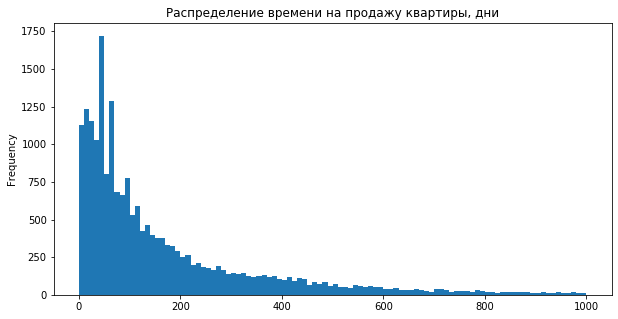

In [47]:
df['days_exposition'] = df['days_exposition'].astype('int')
df['days_exposition'].plot(title='Распределение времени на продажу квартиры, дни', kind='hist', bins=100, range=(0, 1000), figsize=(10,5))

(-20, 700)

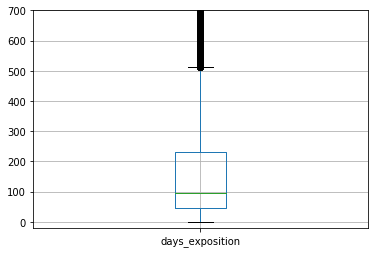

In [48]:
days_to_sold = pd.DataFrame(data=df['days_exposition'])
days_to_sold.boxplot()
plt.ylim(-20,700)

In [50]:
df['days_exposition'].describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

##### Вывод 2

Время на продажу квартиры:
* Нормальное время продажи квартиры, находится в диапазоне от 1 до 520 дней (судя по ящику с усами)
* В среднем квартира продаётся за полгода (180 дней), значение вытянуто из-за больших значений за 4м квартилем;
* Медианное значение при этом равно трём месяцам (95 дня)

Быстрые и долгие продажи:
* Можно считать что продажи прошли очень быстро, если квартира продалась в течение 1.5 месяцев (45 дней – в рамках первого квартиля)
* Необычно долгим сроком, можно всё, что находится за рамками нормального распределения от 1.5 до 4.5 лет (570 дней и до 1580 дней)

<font color='blue'> Здесь тоже все верно.</font>

#### Уберём редкие и выбивающиеся значения

##### Вывод 3
Оставим в массиве значения, находящиейся в рамках нормального распределения.

4 основных ограничения:
* площадь квартиры от 12 до 110 кв.м
* цена от 0.012 до 11,5 млн.
* комант от 1 до 6
* высота потолков от 1 до 2.8 метров

<font color='blue'> Все верно, аномалии удалили.</font>

In [51]:
#создадим новый датафрэйм с нормальными значениями
df1 = df.query('12<=total_area<=110 and 0.012<=last_price_mln<=11.5 and 1<=rooms<=6 and 1<ceiling_height<=2.8')

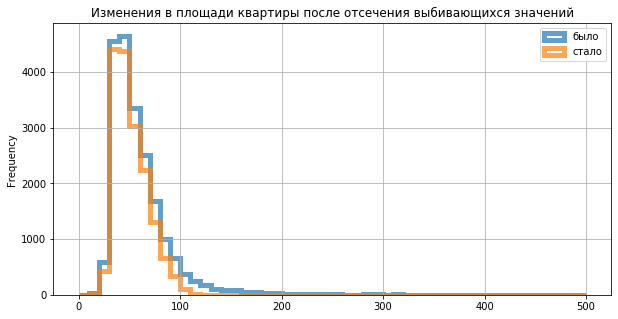

In [60]:
ax = df.plot(kind='hist', y='total_area', histtype='step', range=(0, 500), bins=50, linewidth=5, alpha=0.7, label='было')
df1.plot(kind='hist', y='total_area', histtype='step', range=(0, 500), bins=50, linewidth=5, alpha=0.7, label='стало', ax=ax, grid=True, legend=True, title='Изменения в площади квартиры после отсечения выбивающихся значений', figsize=(10,5))

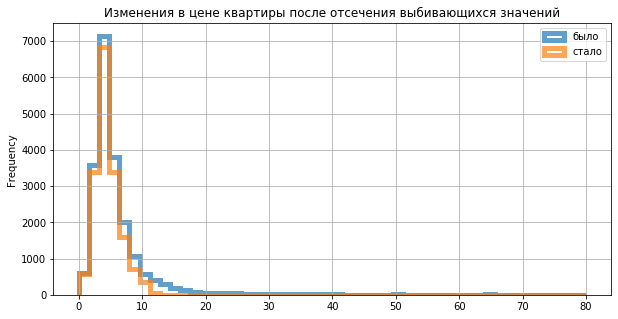

In [63]:
ax = df.plot(kind='hist', y='last_price_mln', histtype='step', range=(0, 80), bins=50, linewidth=5, alpha=0.7, label='было')
df1.plot(kind='hist', y='last_price_mln', histtype='step', range=(0, 80), bins=50, linewidth=5, alpha=0.7, label='стало', ax=ax, grid=True, legend=True, title='Изменения в цене квартиры после отсечения выбивающихся значений', figsize=(10,5))


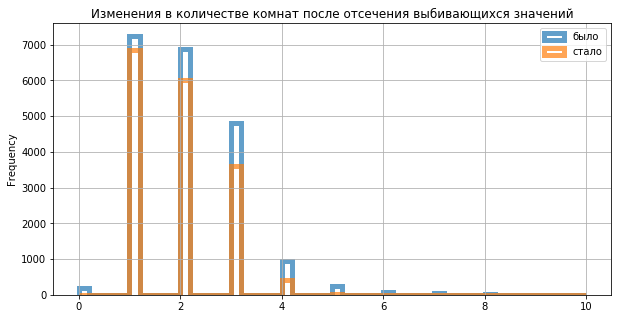

In [66]:
ax = df.plot(kind='hist', y='rooms', histtype='step', range=(0, 10), bins=50, linewidth=5, alpha=0.7, label='было')
df1.plot(kind='hist', y='rooms', histtype='step', range=(0, 10), bins=50, linewidth=5, alpha=0.7, label='стало', ax=ax, grid=True, legend=True, title='Изменения в количестве комнат после отсечения выбивающихся значений', figsize=(10,5))

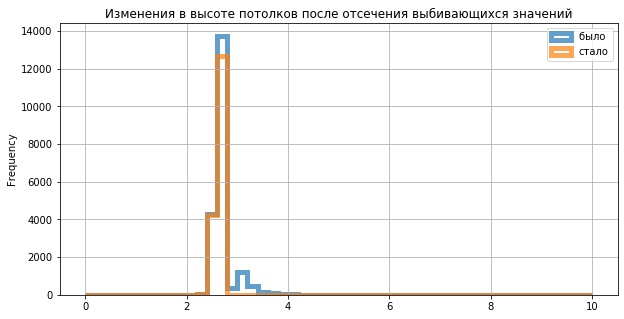

In [67]:
ax = df.plot(kind='hist', y='ceiling_height', histtype='step', range=(0, 10), bins=50, linewidth=5, alpha=0.7, label='было ')
df1.plot(kind='hist', y='ceiling_height', histtype='step', range=(0, 10), bins=50, linewidth=5, alpha=0.7, label='стало', ax=ax, grid=True, legend=True, title='Изменения в высоте потолков после отсечения выбивающихся значений', figsize=(10,5))

#### Узнаем зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.
    
    

In [69]:
#посчитаем коэффициент корреляции между площадью квартиры и стоимостью
df1['total_area'].corr(df1['last_price_mln'])

0.6777090656618356

In [73]:
#посчитаем коэффициент корреляции между числом комнат и стоимостью
df1['rooms'].corr(df1['last_price_mln'])

0.40728439238514463

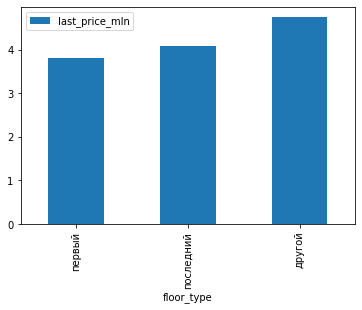

In [74]:
#посмотрим какая есть зависимость этажа квартиры и стоимостью
df1.pivot_table(index='floor_type', values='last_price_mln', aggfunc='mean').sort_values(by='last_price_mln').plot(kind='bar')

In [75]:
df1['floor'].corr(df1['last_price_mln'])

0.19232375167743349

In [76]:
#посчитаем коэффициент корреляции расстояние до центра и стоимостью
df1[df1['cityCenters_nearest']!=-1]['cityCenters_nearest'].corr(df1['last_price_mln'])

-0.3106268459290132

##### Вывод 4
Больше всего на стоимость влияет, площадь квартиры, где корреляция равна +0.67. Количество комнат, так же увеличивает стоимость – корреляция равна +0.41. Этаж, как не странно, влияет на стоимость, но не так сильно как первые два фактора ("какая разница на каком этаже жить, если у тебя большая квартира со многими комнатами"). Расстояние до центра, при этом, влияет отрицательно на стоимость квартиры – чем дальше, тем дешевле, но опять же до определенного предела. Дальше в анализе мы увидим, что после 5км от центра цена сильно падает и затем выходит на плато. 


<font color='blue'> Хорошо, можно еще дополнить анализ матрицей корреляции или scatter_matrix.</font>

#### Изучим зависимость от даты размещения: дня недели, месяца и года. 

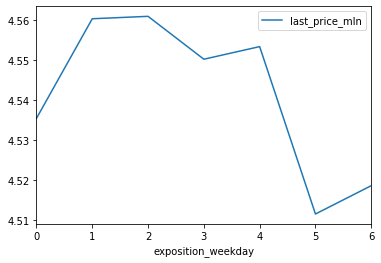

In [80]:
# построим график зависимости цены от дня недели продажи
df1.pivot_table(index='exposition_weekday', values='last_price_mln').plot()

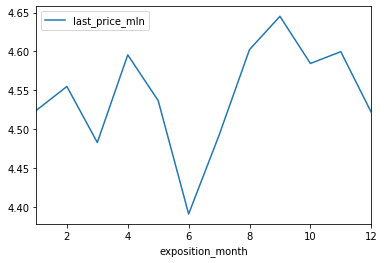

In [78]:
# построим график зависимости цены от месяца продажи
df1.pivot_table(index='exposition_month', values='last_price_mln').plot()

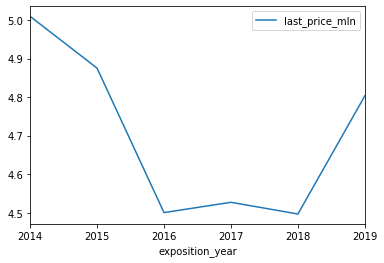

In [82]:
#построим график зависимости цены от года продажи
df1.pivot_table(index='exposition_year', values='last_price_mln').plot()

##### Вывод 5

Дороже всего продаются квартиры выставленные в первой половине рабочей недели с понедельника и по среду. Дальше цена падает и снова повышается в начале недели.

Хуже всего продавать квартиру в середине года – тут наступает стоимостное дно, где цены очень низкие. Вероятно, потому что в начале июня все уезжают отдыхать. В сентября же, когда люди вернулись с отдыха, рынок недвижимости стремительно нагревается и цены взлетают.

Начная с 18 года, цены постепенно идут вверх, до этого же, пока страна была в кризисе, 16 и 17 года, цены были максимально низкими. Сейчас самое время покупать и продавать недвижку.

<font color='blue'> все верно.</font>

#### Выберем 10 населённых пунктов с наибольшим числом объявлений

In [81]:
top_cities = df1.groupby('locality_name')['total_images'].count().sort_values(ascending=False).head(10)

#### Посчитаем среднюю цену квадратного метра в этих населённых пунктах

In [83]:
df1.query('locality_name in @top_cities.index').pivot_table(index='locality_name', values='metre_price').sort_values(by='metre_price', ascending=False)

,metre_price
locality_name,
санкт-петербург,103832.787735
пушкин,99536.389413
деревня кудрово,92884.921478
посёлок парголово,90195.369392
посёлок мурино,85598.623874
посёлок шушары,77935.470794
колпино,75132.150066
гатчина,68122.237464
всеволожск,67083.277560


<font color='blue'> Населенные пункты выделены верно.</font>

#### Выделим населённые пункты с самой высокой стоимостью жилья

In [85]:
expensive_cities_top10 = df1.pivot_table(index='locality_name', values='last_price_mln').sort_values(by='last_price_mln', ascending=False).head(10)
expensive_cities_top10

,last_price_mln
locality_name,
посёлок лисий нос,7.305000
деревня юкки,5.725000
сестрорецк,5.311734
санкт-петербург,5.287154
пушкин,5.070763
неизвестный населенный пункт,5.068363
посёлок репино,4.800000
городской посёлок рощино,4.780000
зеленогорск,4.668200


<font color='blue'> Хорошо.</font>

#### Выделим населённые пункты с самой низкой стоимостью жилья

In [86]:
cheap_cities_top10 = df1.pivot_table(index='locality_name', values='last_price_mln').sort_values(by='last_price_mln', ascending=True).head(10)
cheap_cities_top10

,last_price_mln
locality_name,
деревня вахнова кара,0.4500
деревня старополье,0.4600
деревня бор,0.5000
поселок совхозный,0.5175
посёлок станции свирь,0.5750
деревня выскатка,0.5850
деревня ям-тесово,0.6250
деревня фалилеево,0.6500
поселок цвылёво,0.6500


<font color='blue'> Все верно.</font>

#### Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (*'locality_name'*). Задача — выяснить, какая область входит в центр. 


In [87]:
#выделим из дата сета квартры в Санкт-Петербурге
spb_df = df1.query('locality_name in ("санкт-петербург")')

#### Создадим столбец с расстоянием до центра в километрах: округлите до целых значений.

In [89]:
pd.options.mode.chained_assignment = None
spb_df['cityCenters_nearest_km'] = spb_df['cityCenters_nearest'] / 1000
spb_df['cityCenters_nearest_km'] = round(spb_df['cityCenters_nearest_km']).astype('int')

#### Посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра.

(0, 30)

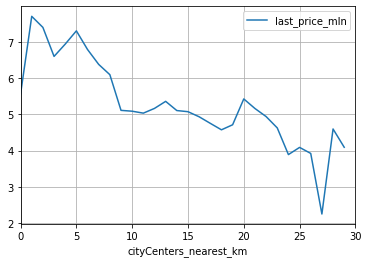

In [91]:
price_on_distance = spb_df.pivot_table(index='cityCenters_nearest_km', values='last_price_mln')
price_on_distance.plot(grid=True)
plt.xlim(0,30)

###### Вывод 6

Начиная от 5 километров, цена начинает падать.  Центральной зоной можно считать область от 0 до 5 км

<font color='blue'> Расстояние выбрано верно.</font>

#### Выделим сегмент квартир в центре

In [92]:
center_segment = spb_df.query('cityCenters_nearest_km <= 5')

#### Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 


total_area           AxesSubplot(0.125,0.536818;0.352273x0.343182)
last_price_mln    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
rooms                   AxesSubplot(0.125,0.125;0.352273x0.343182)
ceiling_height       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

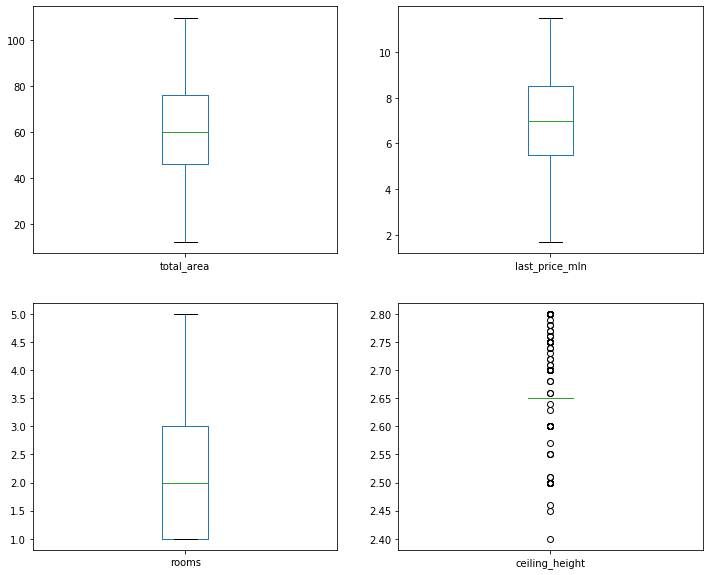

In [94]:
columns = ['total_area', 'last_price_mln', 'rooms', 'ceiling_height']
center_segment[columns].plot(kind='box', subplots=True,layout=(2,2), figsize=(12,10))

#### Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

In [95]:
cols = ['rooms', 'floor', 'cityCenters_nearest_km']
not_center_segment = spb_df.query('cityCenters_nearest_km > 5')

for i in cols:
    print('Коэффициент корреляции поля', i, 'cо стоимостью квартиры в центре = {:.2f}'.format(center_segment[i].corr(center_segment['last_price_mln'])))
print('-------------------------------------------------------------------------------')
for i in cols:
    print('Коэффициент корреляции поля', i, 'cо стоимостью квартиры НЕ в вцентре = {:.2f}'.format(not_center_segment[i].corr(not_center_segment['last_price_mln'])))

Коэффициент корреляции поля rooms cо стоимостью квартиры в центре = 0.44
Коэффициент корреляции поля floor cо стоимостью квартиры в центре = 0.13
Коэффициент корреляции поля cityCenters_nearest_km cо стоимостью квартиры в центре = 0.04
-------------------------------------------------------------------------------
Коэффициент корреляции поля rooms cо стоимостью квартиры НЕ в вцентре = 0.47
Коэффициент корреляции поля floor cо стоимостью квартиры НЕ в вцентре = 0.17
Коэффициент корреляции поля cityCenters_nearest_km cо стоимостью квартиры НЕ в вцентре = -0.17


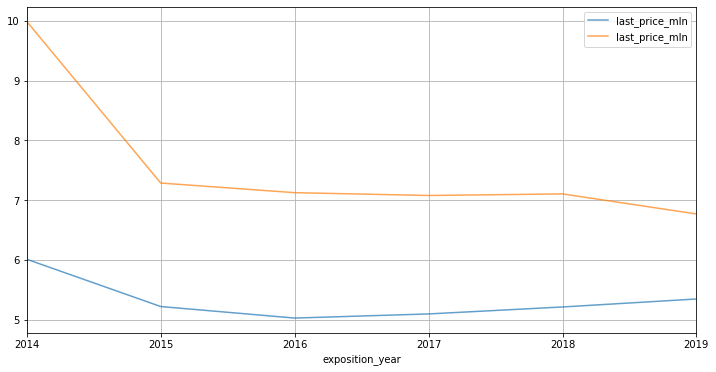

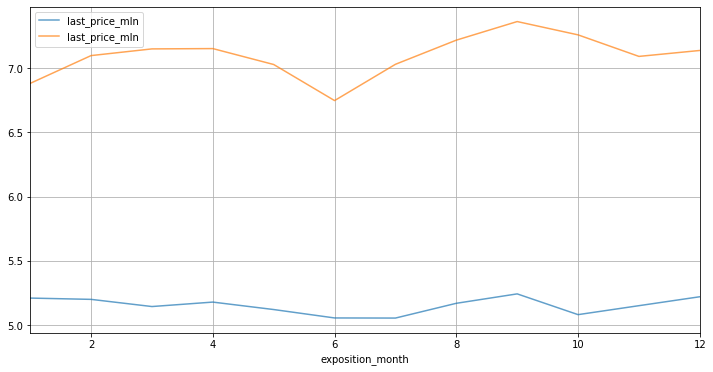

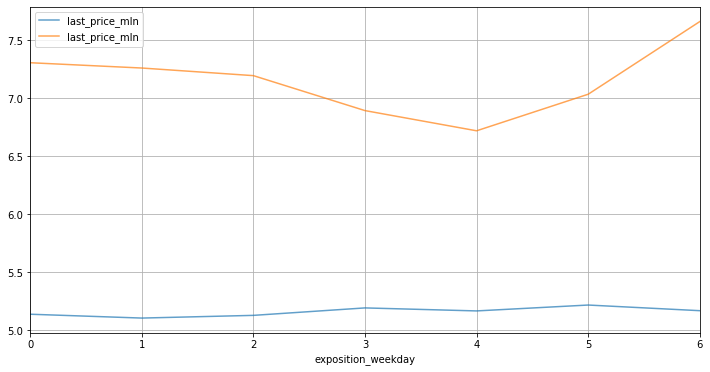

In [97]:
#сравнение цены в не централном и центральном сегменте в зависимости от времени размещения
time = ['exposition_year', 'exposition_month', 'exposition_weekday']
for i in time:
    pp = (not_center_segment
        .pivot_table(index=i, values='last_price_mln', aggfunc='mean')
        .plot(alpha=0.7, legend=True))
    (center_segment
        .pivot_table(index=i, values='last_price_mln', aggfunc='mean')
        .plot(ax=pp, label='В центре', alpha=0.7, figsize=(12,6), grid=True, legend=True))

##### Вывод 7

В отличие от остального города, площадь квартир в центре в среднем на 10 кв. метров больше: 50 кв.м против 60кв. м в центре.
Цены в среднем в полтора раза выше, 4.5млн против 7млн в центре, при одинковом количестве комнат.
Количество комнат является основным фактором при оценке стоимости, в центральном и не центральном районах. Коэффициент корреляции поля rooms cо стоимостью квартиры в центре и не в центре, примерно равны 0.4. Этаж не играет особой роли в определении стоимости (корреляция 0.1).

Рынок неджвижимости в центре более чувствителен к сезонным трендам – видно что рыжая линия (центральный сегмент) резко реагирует, в то время как синия линия (недвижимость не в центре) более стабильна и не имеет резких перепадов.


<font color='blue'> Анализ центра проделан хорошо.</font>

### Шаг 5. Общий вывод

Была проделана большая работа. Сначала предобработали данные: заполнили пропуски, добавили новые столбцы. Применили разные методы для построения графиков и описания данных. Далее сделали анализ и узнали что, на рыночную стоимость недвижимости влияют такие параметры как:
1. Общая площать квартиры (чем больше, чем дороже)
2. Количество комнат (чем больше, чем дороже)
3. Цены в области 5ти км. от центра в полтора раза выше и при этом больше подвержены колебаниям
4. Цены на жильё за центром примерно одинаковые и не сильно изменяются с течением времени
5. Рынок, в целом, очень подвержен сезонности – со спадом к середине года и ростом ближе к концу
6. Этаж квартиры почти не влияет на стоимость жилья




<font color='blue'> Проект выполнен отлично, молодец. Все верно, все четко и ярко. Удачи в следующем проекте.</font>